Index(['ID', ' diagnosis', ' a1', ' a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8',
       'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18',
       'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28',
       'a29', 'a30'],
      dtype='object')
         ID  diagnosis     a1     a2      a3      a4       a5       a6  \
0    842302          M  17.99  10.38  122.80  1001.0  0.11840  0.27760   
1    842517          M  20.57  17.77  132.90  1326.0  0.08474  0.07864   
2  84300903          M  19.69  21.25  130.00  1203.0  0.10960  0.15990   
3  84348301          M  11.42  20.38   77.58   386.1  0.14250  0.28390   
4  84358402          M  20.29  14.34  135.10  1297.0  0.10030  0.13280   

       a7       a8  ...    a21    a22     a23     a24     a25     a26     a27  \
0  0.3001  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.0869  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.1974  0.12790  ...  23.57  25.53 

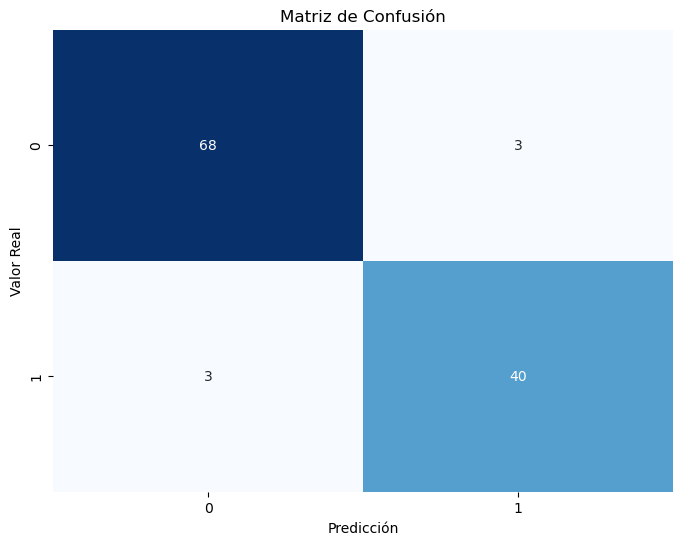

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('breast_cancer.csv')

print(data.columns)
print(data.head())
print(data.info())

# Separar características (X) y variable objetivo (y)
X = data.drop(' diagnosis', axis=1)  # Features
y = data[' diagnosis']  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()